

# Power Production Project for *Fundamentals of Data Analysis* at GMIT
by Radek Wojtczak G00352936<br>


**Instructions:**

>In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
>1. Jupyter notebook that performs simple linear regression on the data set.
>2. In that notebook, an explanation of your regression and an analysis of its accuracy.
>3. Standard items in a git repository such as a README.

>To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set.


# Wind power



**How does a wind turbine work?**

Wind turbines can turn the power of wind into the electricity we all use to power our homes and businesses. They can be stand-alone, supplying just one or a very small number of homes or businesses, or they can be clustered to form part of a wind farm. 

The visible parts of the wind farm that we’re all used to seeing – those towering white or pale grey turbines. Each of these turbines consists of a set of blades, a box beside them called a nacelle and a shaft. The wind – and this can be just a gentle breeze – makes the blades spin, creating kinetic energy. The blades rotating in this way then also make the shaft in the nacelle turn and a generator in the nacelle converts this kinetic energy into electrical energy.

![How it works](img/works.jpg) 

**What happens to the wind-turbine generated electricity next?**

To connect to the national grid, the electrical energy is then passed through a transformer on the site that increases the voltage to that used by the national electricity system. It’s at this stage that the electricity usually moves onto the National Grid transmission network, ready to then be passed on so that, eventually, it can be used in homes and businesses. Alternatively, a wind farm or a single wind turbine can generate electricity that is used privately by an individual or small set of homes or businesses.
 

**How strong does the wind need to be for a wind turbine to work?**

Wind turbines can operate in anything from very light to very strong wind speeds. They generate around 80% of the time, but not always at full capacity. In really high winds they shut down to prevent damage.

![Frequency](img/freq.png)

**Where are wind farms located?**

Wind farms tend to be located in the windiest places possible, to maximise the energy they can create – this is why you’ll be more likely to see them on hillsides or at the coast. Wind farms that are in the sea are called offshore wind farms, whereas those on dry land are termed onshore wind farms.

**Wind energy in Ireland**

Wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland’s largest and cheapest renewable electricity resource. In 2018 Wind provided 85% of Ireland’s renewable electricity and 30% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas. Ireland is one of the leading countries in its use of wind energy and 3rd place worldwide in 2018, after Denmark and Uruguay.

![Windfarms in Ireland](img/map.jpg)

### Exploring dataset:

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns 


from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

In [2]:
# loading our dataset, seting columns names and changing index to start from 1 instead of 0
df = pd.read_csv('dataset/powerproduction.txt', sep=",", header=None)
df.columns = ["speed", "power"]
df = df[1:]
df

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
...,...,...
496,24.775,0.000
497,24.850,0.000
498,24.875,0.000
499,24.950,0.000


In [3]:
# checking for nan values
count_nan = len(df) - df.count()
count_nan

speed    0
power    0
dtype: int64

In [4]:
# Converting Strings to Floats
df = df.astype(float)

In [5]:
# showing first 20 results
df.head(20)

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
6,0.325,4.331
7,0.400,5.186
8,0.450,3.826
9,0.501,1.048
10,0.526,5.553


In [6]:
# basic statistic of speed column
df['speed'].describe()

count    500.000000
mean      12.590398
std        7.224991
min        0.000000
25%        6.324750
50%       12.550500
75%       18.775250
max       25.000000
Name: speed, dtype: float64

In [7]:
# basic statistic of power column
df['power'].describe()

count    500.000000
mean      48.014584
std       41.614572
min        0.000000
25%        5.288000
50%       41.645500
75%       93.537000
max      113.556000
Name: power, dtype: float64

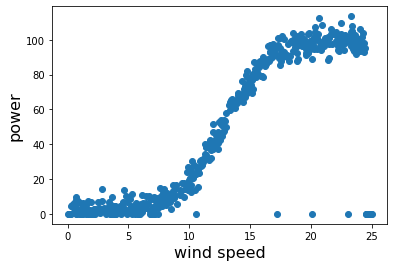

In [8]:
# scatter plot of our dataset
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(df['speed'],df['power'])
plt.show()

In [9]:
df

,speed,power
1,0.000,0.0
2,0.125,0.0
3,0.150,0.0
4,0.225,0.0
5,0.275,0.0
...,...,...
496,24.775,0.0
497,24.850,0.0
498,24.875,0.0
499,24.950,0.0


## Regression

The term regression is used when you try to find the relationship between variables.

In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

## Linear Regression

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

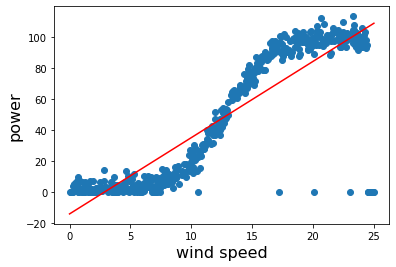

In [10]:
x = df['speed']
y = df['power']

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 25, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x, y)
plt.plot(xfit, yfit, color="red");

In [11]:
print("Parameters:", model.coef_, model.intercept_)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Parameters: [4.91759567] -13.899902630519634
Model slope:     4.9175956654046695
Model intercept: -13.899902630519634


**Different approach: Simple linear regression model**

Fiting line helps to determine, if our model is predicting well on test dataset.
With help of a line we can calculate the error of each datapoint from a line on basis of how fare it is from the line.
Error could be +ve or -ve, and on basis of that we can calculate the cost function.
I have used Fitted Line Plot to display the relationship between one continuous predictor and a response. A fitted line plot shows a scatterplot of the data with a regression line representing the regression equation.

A best fitted line can be roughly determined using an eyeball method by drawing a straight line on a scatter plot so that the number of points above the line and below the line is about equal (and the line passes through as many points as possible).As we can see below our data,are a little bit sinusoidal and in this case best fitted line is trying to cover most of points that are on diagonal, but also it has to cover other data points so its little bit tweaked due to overestimation and underestimation.

I divided data into training and testing samples at ratio of 70-30%. After that I will apply different models to compare the accuracy scores of all models.

In [12]:
x_train,x_test,y_train,y_test = train_test_split(df[['speed']],df.power,test_size = 0.3)

Simple linear regression model

In [13]:
reg_simple = lm.LinearRegression()
reg_simple.fit(x_train,y_train)

LinearRegression()

Best fit line on test dataset with simple linear regression

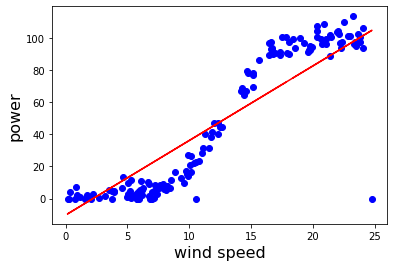

In [14]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_simple.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [15]:
reg_simple.coef_ #slope

array([4.6429901])

In [16]:
reg_simple.intercept_ #y-intercept

-10.232960693899315

In [17]:
reg_simple.score(x_test,y_test)

0.8319421955993738

## Ridge regression and classification

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

In [18]:
reg_ridge = lm.Ridge(alpha=.5)
reg_ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

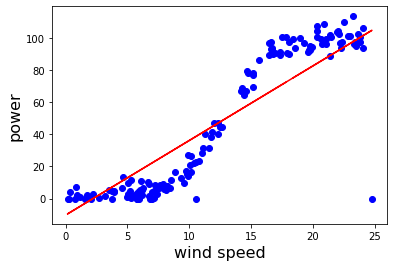

In [19]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridge.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [20]:
reg_ridge.coef_ #slope

array([4.64286466])

In [21]:
reg_ridge.intercept_ #y-intercept

-10.231359775686649

In [22]:
reg_ridge.score(x_test,y_test)

0.8319356246155769

**With regularization parameter.**

In [23]:
reg_ridgecv = lm.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg_ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

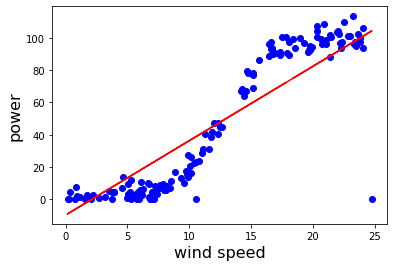

In [24]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridgecv.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [25]:
reg_ridgecv.coef_ #slope

array([4.61803652])

In [26]:
reg_ridgecv.intercept_ #y-intercept

-9.91448926222045

In [27]:
reg_ridgecv.score(x_test,y_test)

0.8306179283928377

# Lasso

In [28]:
reg_lasso = lm.Lasso(alpha=0.1)
reg_lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

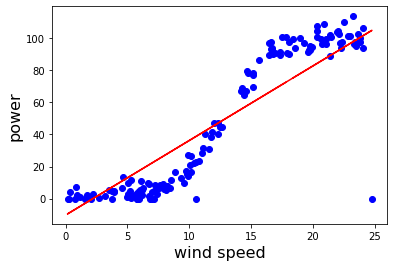

In [29]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_lasso.predict(x_test),color = 'r')
plt.show()

## slope and y-intercept

In [30]:
reg_lasso.coef_ #slope

array([4.64109887])

In [31]:
reg_lasso.intercept_ #y-intercept

-10.208823812217787

In [32]:
reg_lasso.score(x_test,y_test)

0.8318430333795488

# LARS Lasso

In [33]:
reg_lars = lm.Lars(n_nonzero_coefs=1)
reg_lars.fit(x_train,y_train)

Lars(n_nonzero_coefs=1)

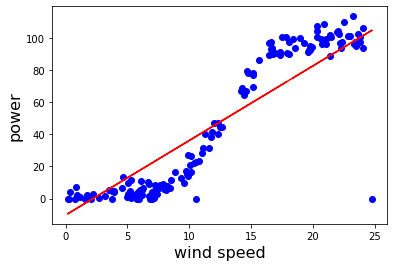

In [34]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_lars.predict(x_test),color = 'r')
plt.show()

## Slope and y-intercept

In [35]:
reg_lars.coef_ #slope

array([4.6429901])

In [36]:
reg_lars.intercept_ #y-intercept

-10.232960693899322

In [37]:
reg_lars.score(x_test,y_test)

0.8319421955993739

**Accuracy** of all models are almost 78% and model having accuracy between 70% to 80% are considered as a good models.<br>
If score value is between 80% and 90%, then model is cosidered as excellent model. If score value is between 90% and 100%, it's a probably an overfitting case.

<img src="img/img2.png">


Above image explains over and under **estimation** of data, We can see in below image that how 
datapoints are overestimating and underestimating at some points



<img src="img/img_exp.png">



In [38]:
logistic_regression = LogisticRegression(max_iter=5000

In [39]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[131 305 156 109 243  60  33 256 128   0  96 284 303 106  22  81 217  49
  62  82 259   0 162 279 152  16  61 267 286 208   0  34  25 124 257   0
 153   0 159   0 104  15 276  39 181 188 280 232 103 210 183   0 140 261
 177 125 116 114 269 118  12   5 263  68 204  50  20 274 265 244 175 258
 309 222 123  73  89 237  36 207 304   0 184  10   0 307 224   0 314 174
 247  51   0 198  41  91  97 155   0 225 310 290 122 197  98 220  94   0
 216 126   0  54   0   0  23 230 235 260   0 107 278 250 137  13  35 157
 292   0  32 226 252 168   0  67 133 187  74 158 120 215  64 206 112 211
 173  63 266 167 249 150 142 148 254 272 199 229  27 196  52   0 119  11
 102 165 170  85 283 236 192 135   0 253   0   8  48 273  57 189   0 285
 296   2  19 295 299 297  37  72 300 251 209  53 144   0 146 195  42  92
   0 255 231 233 218 239   0   0 108 164  78 166 178 293 117 132 214  70
 205   4  76 129 238 101 287 241   0 176 151 262   0  99  79 160   0   9
 227  17  69 127 212 191 180 312 275 113 202 147 27

In [40]:
logistic_regression.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [41]:
logistic_regression.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [42]:
y_pred = logistic_regression.predict(x_test)

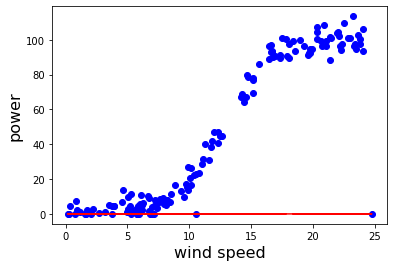

In [43]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,logistic_regression.predict_proba(x_test)[:,1],color = 'r')
plt.show()


In [44]:
logistic_regression.coef_.mean() #slope

-3.852183757165524e-11

In [45]:
logistic_regression.intercept_ .mean()#y-intercept

-1.530260926792546e-13

In [46]:
test_enc = preprocessing.LabelEncoder()
y_test_encoded = test_enc.fit_transform(y_test)
logistic_regression.score(x_test,y_test_encoded)

0.08

In [47]:
filter = df["power"]==0.0
filter


1      True
2      True
3      True
4      True
5      True
       ... 
496    True
497    True
498    True
499    True
500    True
Name: power, Length: 500, dtype: bool

In [48]:
# using enumerate() + list comprehension 
# to return true indices. 
res = [i for i, val in enumerate(filter) if val] 
  
# printing result 
print ("The list indices having True values are : " +  str(res))

The list indices having True values are : [0, 1, 2, 3, 4, 15, 16, 24, 26, 31, 35, 37, 39, 42, 43, 44, 47, 60, 65, 67, 70, 73, 74, 75, 83, 89, 105, 110, 111, 114, 133, 135, 136, 140, 149, 208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]


In [49]:
update = df.drop(df.index[[15, 16, 24, 26, 31, 35, 37, 39, 42, 43, 44, 47, 60, 65, 67, 70, 73, 74, 75, 83, 89, 105, 110, 111, 114, 133, 135, 136, 140, 149, 208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]])
update

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
...,...,...
486,24.249,103.700
487,24.299,93.694
488,24.349,93.078
489,24.374,98.223


In [50]:
x_train,x_test,y_train,y_test = train_test_split(update[['speed']],update.power,test_size = 0.3)

In [53]:
log = LogisticRegression(max_iter=5000)

In [54]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[237 270 154 207  71 293 144 301 183  99 313   2 236  53 303 268 166  80
 294 273  63 228  98  38 283 149  75 178  77 225  86 292  32 299  94 289
 116 256 247 271 216 100 252 110 131 220 295 204  27  96 258 253  34  55
   6 262 139 109  29 176   5  44  10 122 104 111 160 312 308 114 108  78
  93   0 251  50 282 194  23 134 187  46  12 241  47 199  24  90 255  74
 224 170 215  89 227 175 124  45 231 132 117 284 157 309  28   7 185 238
  97 233 158 145 298  13  66 297 141 230 275 163 150   1 102 148 248 118
  15 267  39  21 172 128 278 115 155 232 239 196 246  64 159 107   4  85
 226   0 277 200 290 302 211  17  65 146 266 300 263 165 219  20  37 106
  56 179 296 137  68 269 197 101 125 184 119  67 249 286 120  79 143 261
  14 167 222 136 274  88 130 147 305 206 260 291  73 223 177 191 135  59
  87  70 182   0  31 214  11 123  25 212 198 133 140 205 234 113 151 189
  76   9 214  26 218 162 210  62 217 203 126  41 138  16 265  49  69   3
 142 190 272 127 168 310  84 105 103 174  60   8 28

In [56]:
log.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [59]:
y_pred = log.predict_proba(x_test)[:,1]

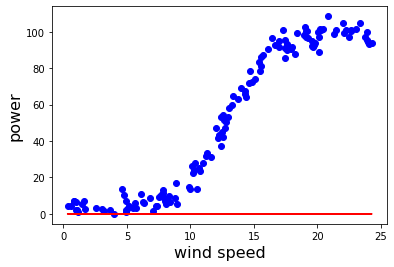

In [60]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,log.predict_proba(x_test)[:,1],color = 'r')
plt.show()

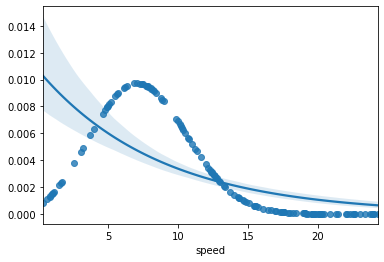

In [61]:
sns.regplot(x_test, y_pred, data=update, logistic=True)
